In [1]:
# Regression Logistique

# Importer les librairies
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
# Importer le dataset
dataset = pd.read_csv('Social_Network_Ads.csv')
print (dataset.shape)

# creation de la matrice des variables indépendantes
X = dataset.iloc[:, [2, 3]].values
# creation de la matrice de la variable à predire
y = dataset.iloc[:, -1].values


(400, 5)


In [3]:
# Diviser le dataset entre le Training set et le Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [4]:
# Feature Scaling : mettre à l'echelle les differentes valeurs
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [5]:
# Construction du modèle : fit(X,Y) apprend les paramètres du modèle à partir de données d’apprentissage
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, y_train)

C:\Users\aleleannec\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=0, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [6]:
# Faire de nouvelles prédictions
y_pred = classifier.predict(X_test)

In [7]:
# Matrice de confusion
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


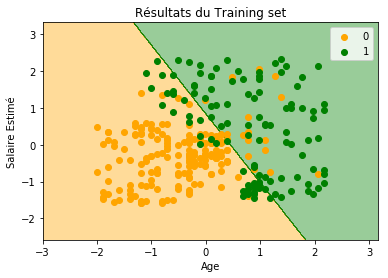

In [8]:
# Visualiser les résultats : region de prédiction + tracer de la limite entre les 2 régions
# les points verts sont les utilisateurs qui ont realisé l'evenement et les points rouges sont les ut qui n'ont pas realise l'evt
# possibilité de verifier les resultats sur les echantillons de test pour apprehender une 1ere idee d'over fitting
# faut-il construire un modele non lineaire ?
# chacun des points pixel est colorié avec le pas de 0.01
from matplotlib.colors import ListedColormap
X_set, y_set = X_train, y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.4, cmap = ListedColormap(('orange', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('orange', 'green'))(i), label = j)
plt.title('Résultats du Training set')
plt.xlabel('Age')
plt.ylabel('Salaire Estimé')
plt.legend()
plt.show()

In [9]:
# Recuperer l'equation du modele
print(classifier.intercept_)
print(classifier.coef_)
print(classifier.score(X_train, y_train))

[-0.92421803]
[[2.06169269 1.10338288]]
0.8233333333333334


In [10]:
# Afficher la matrice de confusion : bien classés / mal classés
print (cm)

[[65  3]
 [ 8 24]]


In [11]:
# Travail sur la courbe de ROC
from sklearn.metrics import roc_curve

fpr_cl = dict()
tpr_cl = dict()

y_pred = classifier.predict(X_test)
#calcul des probas d'affectation sur ech. test
y_proba = classifier.predict_proba(X_test)

fpr_cl["classe 0"], tpr_cl["classe 0"], _ = roc_curve(
    y_test == 0, y_proba[:, 0].ravel())
fpr_cl["classe 1"], tpr_cl["classe 1"], _ = roc_curve(
    y_test, y_proba[:, 1].ravel())  # y_test == 1

prob_pred = np.array([y_proba[i, 1 if c else 0]
                         for i, c in enumerate(y_pred)])
fpr_cl["tout"], tpr_cl["tout"], _ = roc_curve(
    (y_pred == y_test).ravel(), prob_pred)

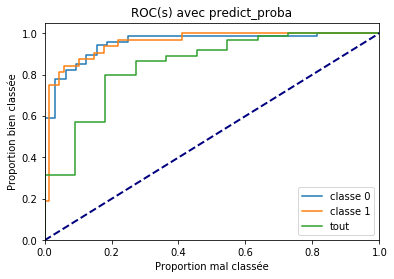

In [12]:
plt.figure()
for key in fpr_cl:
    plt.plot(fpr_cl[key], tpr_cl[key], label=key)

lw = 2
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("Proportion mal classée")
plt.ylabel("Proportion bien classée")
plt.title('ROC(s) avec predict_proba')
plt.legend(loc="lower right")

In [13]:
# Importation de metrics - utilisé pour les mesures de performances
from sklearn import metrics

# AUC
AUC = metrics.roc_auc_score(y_test, y_pred)
print ('AUC', AUC)

#taux de succès
acc = metrics.accuracy_score(y_test,y_pred)
print('Taux de succès : ',acc)

#taux d'erreur
err = 1.0 - acc
print('Taux d erreur : ',err)

#sensibilité (ou rappel)
se = metrics.recall_score(y_test,y_pred)
print('Sensibilité : ', se) 

AUC 0.8529411764705883
Taux de succès :  0.89
Taux d erreur :  0.10999999999999999
Sensibilité :  0.75


In [14]:
# Test de validation croisée : pratique pour les petits échantillons

#importer la classe LogisticRegression
from sklearn.linear_model import LogisticRegression

#création d'une instance de la classe
lr = LogisticRegression()

#exécution de l'instance sur la totalité des données (X,y)
modele_all = lr.fit(X,y)

#affichage
print(modele_all.coef_,modele_all.intercept_)
# [[-5.88775640e-03 -9.74010077e-09]] [-0.00510052]
# L'équation du modèle est modifiée - utiliser la validation croisée peut rendre plus robuste l'équation sur de petits ech

#utilisation du module model_selection
from sklearn import model_selection

#évaluation en validation croisée : 10 cross-validation
succes = model_selection.cross_val_score(lr,X,y,cv=10,scoring='accuracy')

#détail des itérations
print('Taux de succes', succes) # [0.68292683 0.63414634 0.63414634 0.65 0.65 0.65 0.65 0.64102564 0.64102564 0.66666667]

#moyenne des taux de succès = estimation du taux de succès en CV
print('Moyenne des taux de succes', succes.mean()) # 0.65

[[-5.88775640e-03 -9.74010077e-09]] [-0.00510052]
Taux de succes [0.68292683 0.63414634 0.63414634 0.65       0.65       0.65
 0.65       0.64102564 0.64102564 0.66666667]
Moyenne des taux de succes 0.6499937460913072


C:\Users\aleleannec\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\aleleannec\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\aleleannec\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\aleleannec\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\aleleannec\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Spec

In [15]:
print(modele_all.coef_,modele_all.intercept_)

[[-5.88775640e-03 -9.74010077e-09]] [-0.00510052]


C:\Users\aleleannec\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  


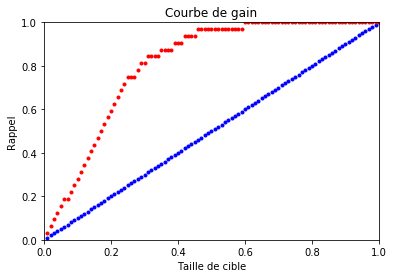

In [16]:
### Production de la courbe de lift

#score de 'presence'
score = y_proba[:,1] # [0.86238322 0.21334963 0.15895063 …]
#transf. en 0/1 de Y_test
pos = pd.get_dummies(y_test).as_matrix()

#on ne récupère que la 2è colonne (indice 1)
pos = pos[:,1]

#nombre total de positif
npos = np.sum(pos) 

#index pour tri selon le score croissant
index = np.argsort(score)

#inverser pour score décroissant – on s’intéresse à forte proba. en priorité
index = index[::-1] 

#tri des individus (des valeurs 0/1)
sort_pos = pos[index] 

#somme cumulée
cpos = np.cumsum(sort_pos) 

#rappel
rappel = cpos/npos 

#nb. obs ech.test
n = y_test.shape[0]

#taille de cible – séquence de valeurs de 1 à 100 avec un pas de 1
taille = np.arange(start=1,stop=101,step=1) 

#passer en proportion
taille = taille / n

#graphique avec matplotlib
import matplotlib.pyplot as plt
#titre et en-têtes
plt.title('Courbe de Lift / gain')
plt.xlabel('Population')
plt.ylabel('% evt')
#limites en abscisse et ordonnée
plt.xlim(0,1)
plt.ylim(0,1)
#astuce pour tracer la diagonale
plt.scatter(taille,taille,marker='.',color='blue')
#insertion du couple (taille, rappel)
plt.scatter(taille,rappel,marker='.',color='red')
#affichage
plt.show()

i=2 0.9786537776546741 0.3146067415730337 0.0
i=20 0.529977601865224 1.0 0.7272727272727273


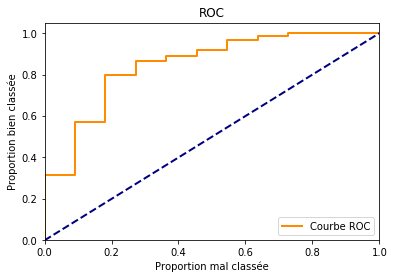

In [52]:
# Courbe de ROC Globale

from sklearn.metrics import roc_curve
prob_pred = [y_proba[i, c] for i, c in enumerate(y_pred)]
fpr, tpr, th = roc_curve((y_pred == y_test).ravel(), prob_pred)

print("i=2", th[2], tpr[2], fpr[2])
print("i={0}".format(len(th) - 2), th[-2], tpr[-2], fpr[-2])
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange', lw=lw, label='Courbe ROC')
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("Proportion mal classée")
plt.ylabel("Proportion bien classée")
plt.title('ROC')
plt.legend(loc="lower right")